In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
x = iris.data
y = iris.target

In [6]:
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 選擇 sepal length 跟 petal length 做預測

In [8]:
X = x[:,[0,2]]

In [9]:
Y = y

In [10]:
len(X)
# 總共有150種鳶尾花

150

#### 開始訓練資料、測試資料

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.27, random_state = 0)

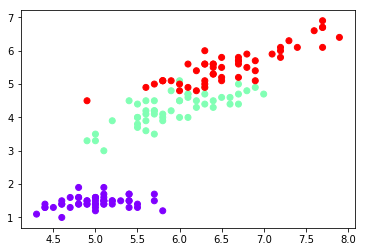

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="rainbow")

In [14]:
from sklearn.svm import SVC

In [15]:
clf = SVC(gamma='auto')
# 開一台函數學習機

In [16]:
clf.fit(x_train, y_train)
# 訓練

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_predict = clf.predict(x_test)
# 新的 predict

In [18]:
y_predict
# 預測結果

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2])

In [19]:
y_test
# 對正確答案

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2])

In [20]:
y_predict - y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0])

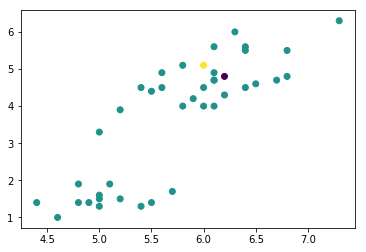

In [21]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict - y_test)

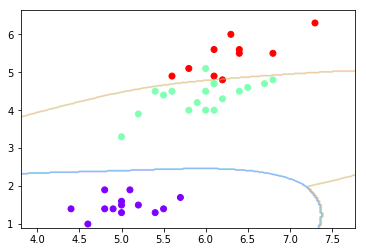

In [22]:
x0 = np.arange(3.8, 7.8, 0.02)
y0 = np.arange(0.9, 5.2, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contour(xm, ym, Z, cmap='rainbow', alpha=0.2)

plt.scatter(x_test[:,0], x_test[:,1], cmap='rainbow', c=y_test)

由此可看出，其中兩點預測錯誤，因此再選取另外兩個（sepal length ＆ petal length）做預測